In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [4]:
rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [6]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
seed=42

In [7]:
df = pd.read_csv(trn_file, index_col = 0)
print(df.shape)
df.head

(320000, 19)


<bound method NDFrame.head of                 u          g          r          i          z  redshift  \
id                                                                        
0       23.263956  20.336773  19.009500  17.672439  16.939607 -0.000081   
1       15.052147  14.061969  13.452418  13.268450  13.168941  0.004506   
2       16.786385  15.825426  15.536318  15.393535  15.350032  0.000472   
3       25.660638  21.188727  20.221158  19.894949  19.634649  0.000006   
4       24.453429  20.699170  19.042368  18.324152  17.982649 -0.000033   
...           ...        ...        ...        ...        ...       ...   
319995  18.365648  17.240883  16.773898  16.484970  16.340403  0.051988   
319996  18.685639  17.665802  17.190434  16.816858  16.636688  0.087261   
319997  21.188972  18.423357  17.295610  16.901072  16.684127 -0.000010   
319998  18.847187  17.318605  16.505729  16.180571  15.911624 -0.000045   
319999  19.860438  18.819866  18.515579  18.414884  18.307998 -0.00096

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [88]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
 19  pred       320000 non-n

In [10]:
df.describe()


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [72]:
target_col='nObserve'
pred_col = 'pred'
num_cols = ['u','r','dered_u'] # num_col은 종속변수가 아니면서 데이터타입이 int,float인것
print(num_cols)

['u', 'r', 'dered_u']


<AxesSubplot:>

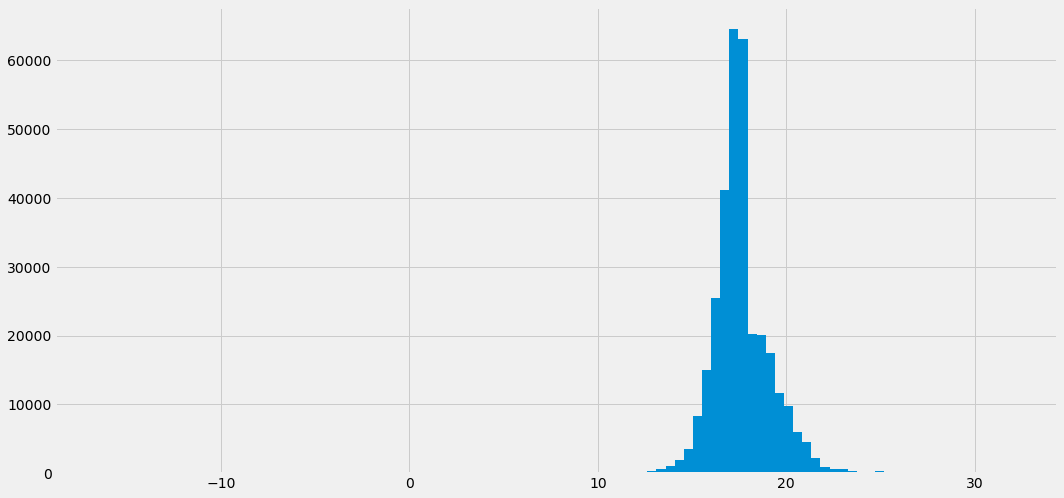

In [73]:
df.dered_r.hist(bins=100)

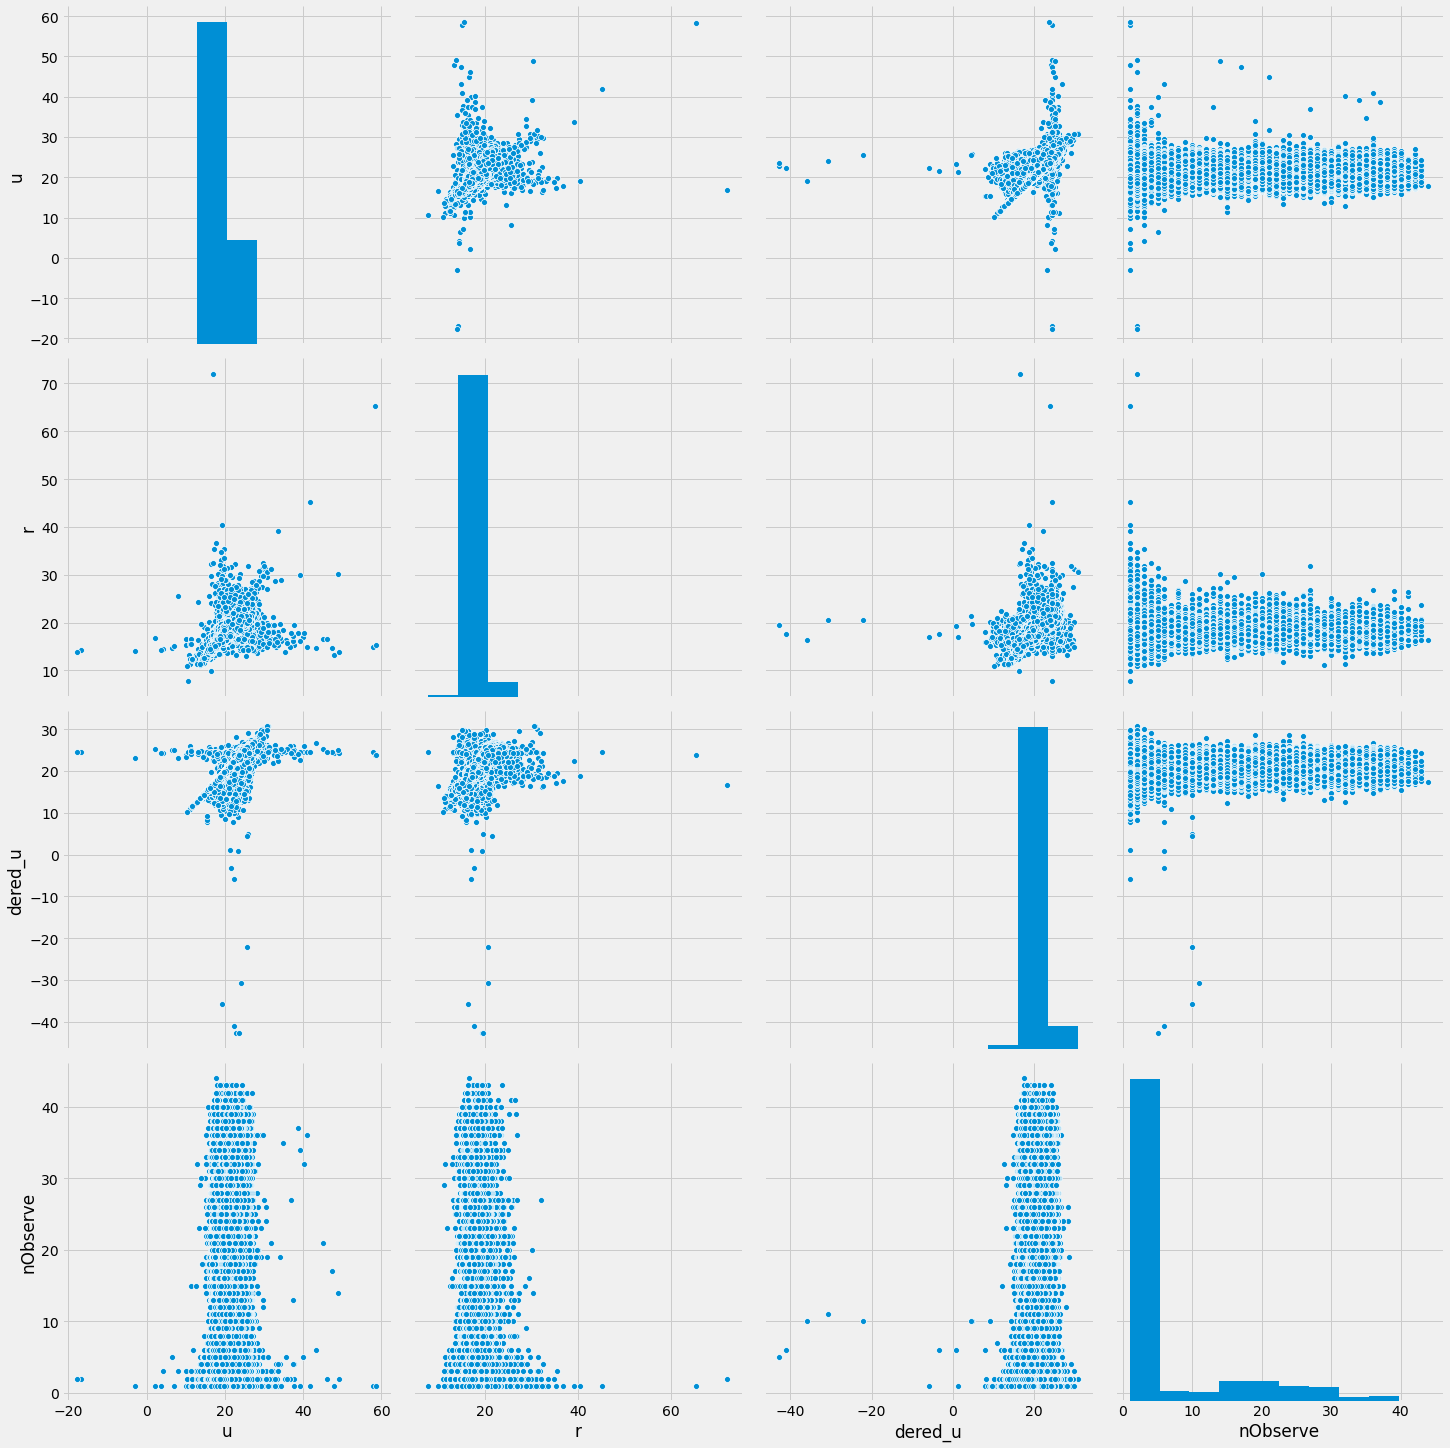

In [74]:
sns.pairplot(data=df, vars=num_cols + [target_col],size=5)

In [75]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y,p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y),np.log1p(p)))

In [76]:
lr=LinearRegression()
lr.fit(df[num_cols], df[target_col])
df[pred_col] = lr.predict(df[num_cols])

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        8.64


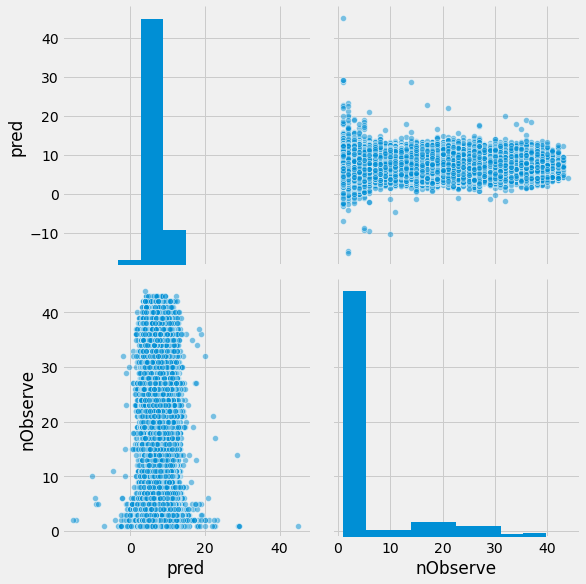

In [77]:

sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})


<AxesSubplot:>

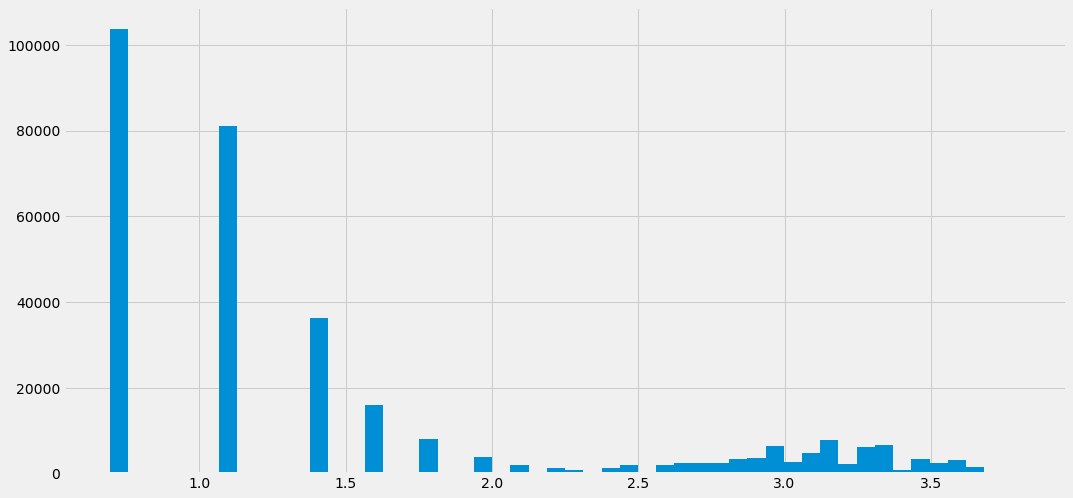

In [78]:
df.nObserve.apply(np.log1p).hist(bins=50)

In [79]:

lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.18
RMLSE:	        0.88


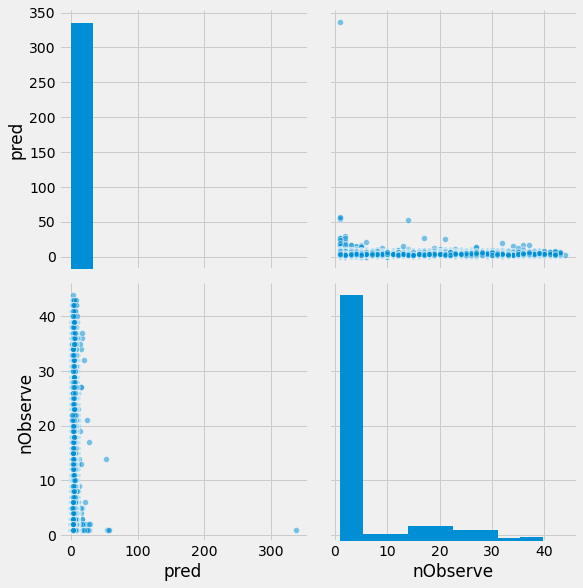

In [80]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

Text(0, 0.5, 'prediction')

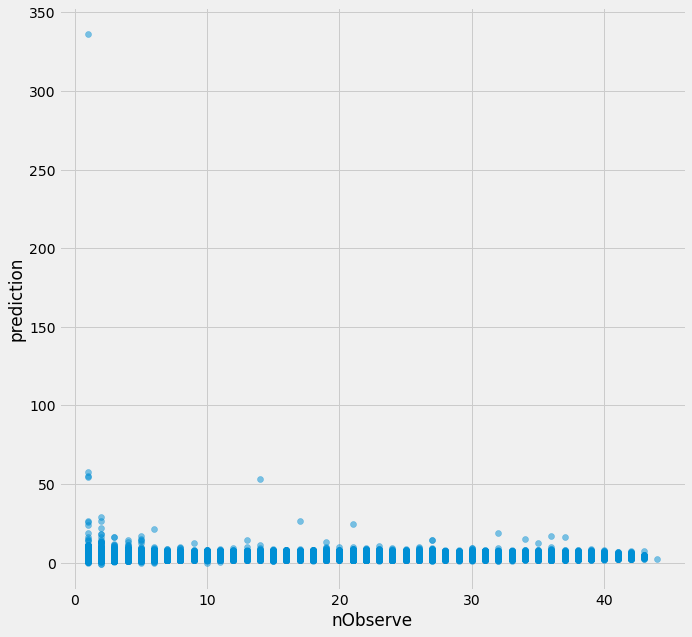

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('nObserve')
plt.ylabel('prediction')

In [82]:
df[num_cols].describe()

,u,r,dered_u
count,320000.000000,320000.000000,320000.000000
mean,19.852429,17.735761,19.628874
std,1.945548,1.466242,1.923586
min,-17.687512,7.731354,-42.837530
25%,18.724150,16.877190,18.563598
50%,19.419439,17.525850,19.264635
75%,20.432092,18.428089,20.197603
max,58.623328,72.009662,30.777850


In [85]:
df[['u', 'r', 'dered_u']] = df[['u', 'r', 'dered_u']].apply(np.log1p)
df[num_cols].describe()

,u,r,dered_u
count,319997.000000,320000.000000,319992.000000
mean,3.033407,2.927491,3.022637
std,0.089083,0.076125,0.090037
min,1.183288,2.166920,0.561782
25%,2.981847,2.883526,2.973676
50%,3.016488,2.919167,3.008878
75%,3.064891,2.966720,3.053890
max,4.088047,4.290592,3.458770


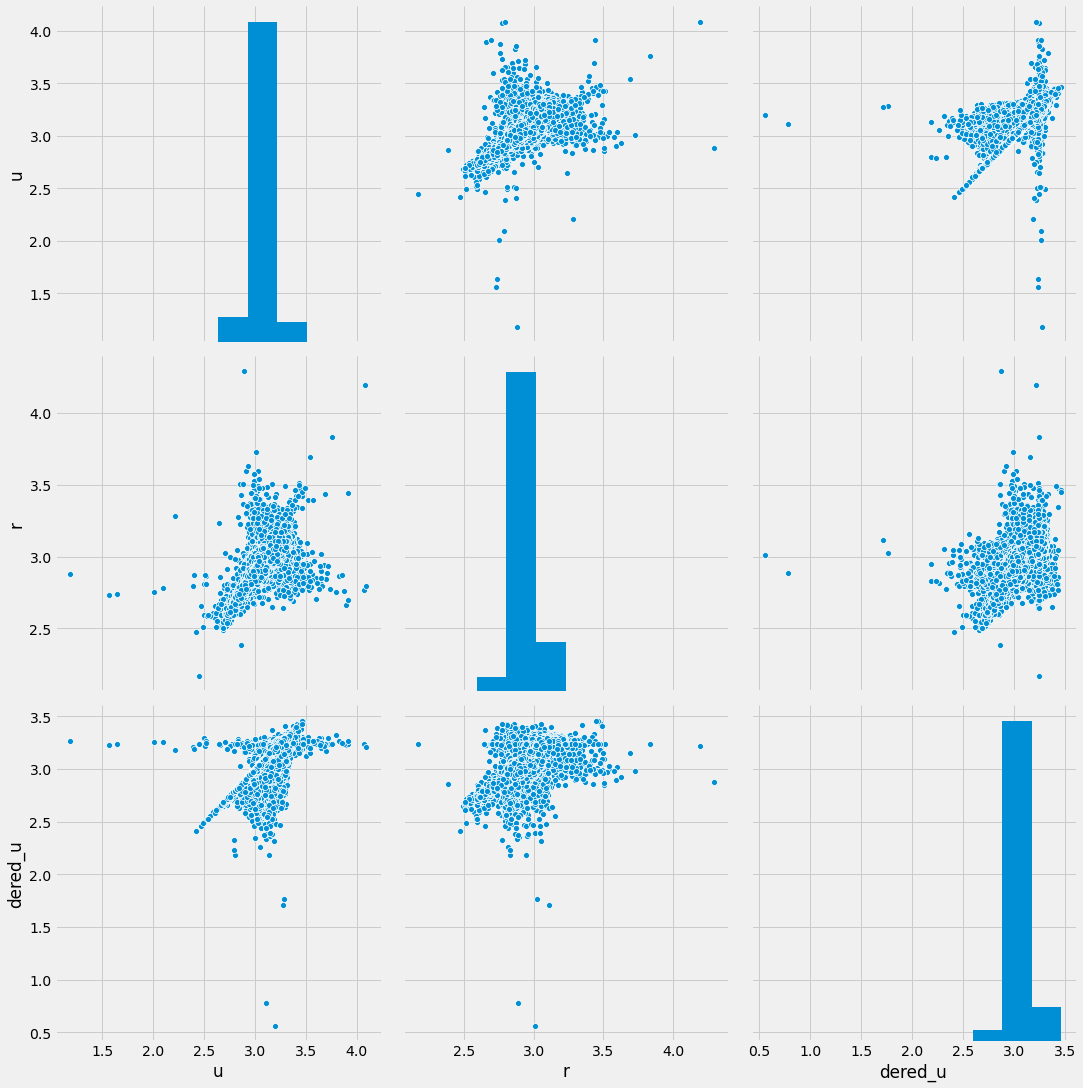

In [86]:
sns.pairplot(data=df, vars=num_cols, size=5)

In [90]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.14
RMLSE:	        0.88


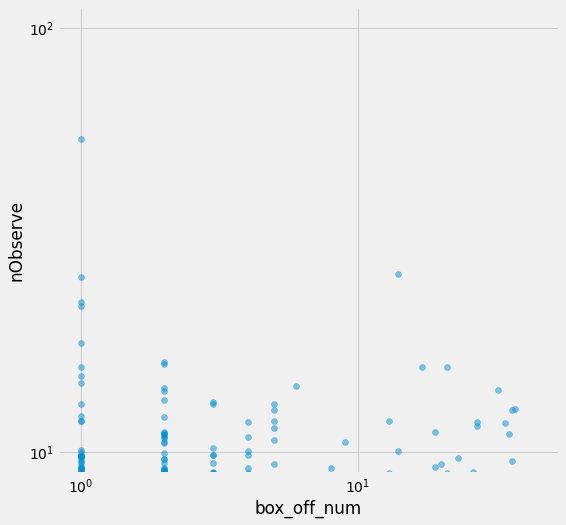

In [92]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('nObserve')
plt.yscale('log')
plt.xscale('log')

In [93]:
df.head()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,pred
id,,,,,,,,,,,,,,,,,,,,
0,3.188992,20.336773,2.996207,17.672439,16.939607,-0.000081,3.183218,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0,5.400637
1,2.775843,14.061969,2.670862,13.268450,13.168941,0.004506,2.770488,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1,1.208697
2,2.878433,15.825426,2.805559,15.393535,15.350032,0.000472,2.868333,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0,1.966526
3,3.283188,21.188727,3.054999,19.894949,19.634649,0.000006,3.271607,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0,7.057217
4,3.236850,20.699170,2.997848,18.324152,17.982649,-0.000033,3.209690,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0,6.003830


In [94]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [95]:

scaler = StandardScaler()
X = scaler.fit_transform(df[num_cols])

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.14
RMLSE:	        0.88


In [96]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[num_cols])

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.14
RMLSE:	        0.88


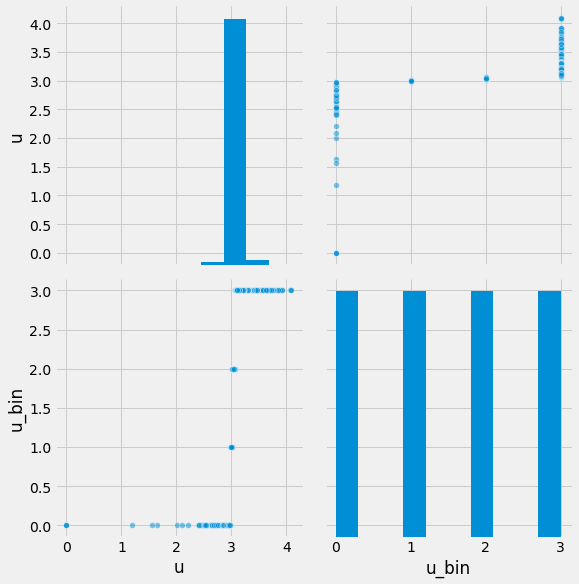

In [98]:
df['u_bin'] = pd.qcut(df['u'], 4, labels=False)
sns.pairplot(data=df, vars=['u', 'u_bin'], size=4, plot_kws={'alpha': .5})

In [100]:
df['u_bin'] = pd.qcut(df['u'], 4, labels=False)
df[['u', 'u_bin']].head(10)

,u,u_bin
id,,
0,3.188992,3
1,2.775843,0
2,2.878433,0
3,3.283188,3
4,3.236850,3
5,2.873587,0
6,3.215120,3
7,3.002823,1
8,2.974573,0


In [101]:
X = pd.concat([df[num_cols], pd.get_dummies(pd.qcut(df['u'], 4, labels=False))], axis=1)
X.shape

(320000, 7)

In [102]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.55
RMLSE:	        0.85


In [103]:

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.55
RMLSE:	        0.85


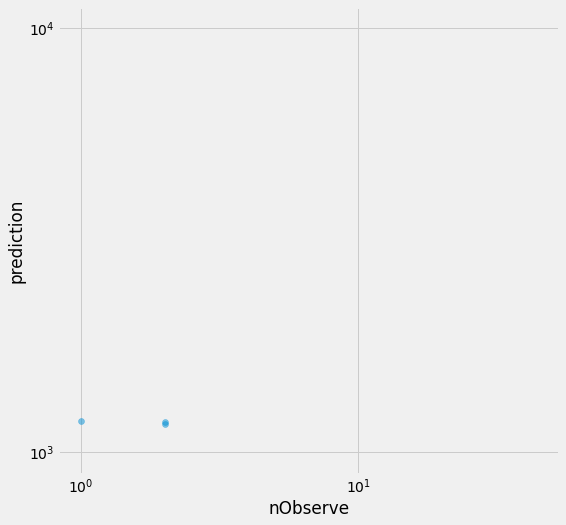

In [105]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('nObserve')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(df[num_cols])
print(X.shape)

(320000, 10)


In [108]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        9.11
RMLSE:	        0.88


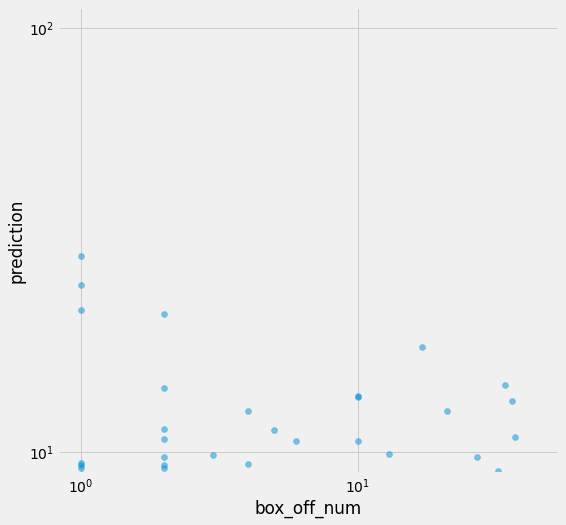

In [109]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')